In [ ]:
#this code is an addition to dataViz


Bad key "text.kerning_factor" on line 4 in
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


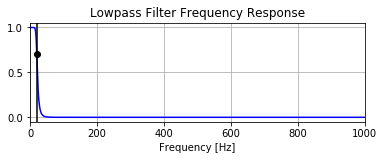

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 2000       # sample rate, Hz
cutoff = 20  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()



In [2]:
def lowpass(x,ss,ee):
    '''
        Accepts: a file id, x
        Returns: Prints parameters about a specific record
                 Plots the locally detected peaks
    
    '''
    
    rec = wav_files[x][:-4]

    record = wfdb.rdrecord(dataset_path + folder+rec) 
    
    print(record.sig_name)
    print(record.comments)
    print(record.record_name)
    print(record.fs)
    
    a = record.p_signal[:,0]
    
    
    
    pcg = record.p_signal[:,0]
    ecg = record.p_signal[:,1]
    
    
    # Filter requirements.
    order = 6
    fs = 2000       # sample rate, Hz
    cutoff = 20  # desired cutoff frequency of the filter, Hz
    
    filtered_pcg = butter_lowpass_filter(pcg, cutoff, fs, order)
    filtered_ecg = butter_lowpass_filter(ecg, cutoff, fs, order)
    
    plt.figure()
    plt.plot(pcg[ss:ee])
    plt.plot(filtered_pcg[ss:ee])
    
    
    plt.figure()
    plt.plot(ecg[ss:ee])
    plt.plot(filtered_ecg[ss:ee])
    
    #wfdb_custom.plot_wfdb(100,14000,peaks,record=record, title='Record ' + rec + ' from PhysioNet Challenge 2016' + ' => ' + record.__dict__['comments'][0],figsize=(20,10), time_units = 'samples',ecg_grids=[1]) 
    
    
    #plt.plot(a)

In [ ]:
lowpass(69,100,9000)